# Breast Cancer Classification Using Perceptron Algorithm

This Jupyter notebook demonstrates the process of using the **Perceptron Algorithm** to classify breast cancer data into **Malignant** and **Benign** categories. The dataset used is the **Breast Cancer Wisconsin (Diagnostic) dataset**, which is available in the **`sklearn.datasets`** module.

## Objective
The main objective of this project is to:
1. Implement the Perceptron algorithm from scratch.
2. Use the Breast Cancer dataset to classify the samples into two classes: Malignant and Benign.
3. Evaluate the model using accuracy and visualize the decision boundary.

## Key Steps:
- Load the Breast Cancer dataset.
- Preprocess the data (scaling and splitting).
- Implement the Perceptron algorithm.
- Train the model and evaluate it.
- Visualize the decision boundary for the model's predictions.

This notebook is useful for learning the fundamentals of the Perceptron algorithm, data preprocessing, and basic machine learning workflows.

## Requirements:
- numpy
- pandas
- scikit-learn
- matplotlib


## 1. Loading and Preprocessing the Data

In this section, we load the **Breast Cancer dataset** from `sklearn.datasets` and perform basic preprocessing tasks:
- Convert the data into a **DataFrame** using **Pandas** for easier manipulation.
- Split the dataset into **training** and **test** sets.
- Select two features for visualization and model training.
- Normalize the data using **StandardScaler** to improve the performance of the model.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [19]:
# بارگذاری دیتاست سرطان سینه از scikit-learn
data = datasets.load_breast_cancer()

# تبدیل داده‌ها به DataFrame با پانداس
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# داده‌ها و برچسب‌ها (target)
X = df.drop('target', axis=1)
y = df['target']

# تقسیم داده‌ها به داده‌های آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# انتخاب دو ویژگی برای تجسم
X_train_2d = X_train.iloc[:, 1:3]  # فقط دو ویژگی اول برای آموزش
X_test_2d = X_test.iloc[:, 1:3]  # داده‌های تست برای مرز تصمیم‌گیری

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_train_2d = scaler.fit_transform(X_train_2d)
X_test_2d = scaler.transform(X_test_2d)

## 2. Implementing the Perceptron Algorithm

In this section, we implement the **Perceptron Algorithm** from scratch. The key components are:
- **Initialization**: Initialize weights and bias to zero.
- **Fit Method**: Iterate over the training data, calculate predictions, and update weights if a misclassification occurs.
- **Step Function**: A simple activation function to classify data into two categories.
- **Prediction**: Compute the dot product between the input data and weights, then apply the step function for classification.

The Perceptron is a linear classifier, and its performance depends heavily on the linear separability of the data.


In [20]:
# کلاس پرسپترون
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=10000):
        self.learning_rate = learning_rate  # نرخ یادگیری
        self.epochs = epochs                # تعداد تکرارها
        self.weights = None                 # وزن‌ها (برای هر ویژگی)
        self.bias = None                    # بایاس (برای جابجایی مرز تصمیم)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape  # تعداد نمونه‌ها و ویژگی‌ها
        self.weights = np.zeros(n_features)  # مقداردهی اولیه وزن‌ها به صفر
        self.bias = 0  # مقداردهی اولیه بایاس به صفر
        
        # تکرار بر روی داده‌ها برای تعداد مشخصی از دورها (epochs)
        for _ in range(self.epochs):
            for i in range(n_samples):  # برای هر نمونه در داده
                # محاسبه خروجی خطی (z = wx + b)
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self._step_function(linear_output)  # پیش‌بینی با تابع مرحله‌ای (step function)
                
                # به‌روزرسانی وزن‌ها اگر پیش‌بینی اشتباه باشد
                if y.iloc[i] * linear_output <= 0:  # اگر پیش‌بینی صحیح نباشد
                    self.weights += self.learning_rate * y.iloc[i] * X[i]  # به‌روزرسانی وزن‌ها
                    self.bias += self.learning_rate * y.iloc[i]  # به‌روزرسانی بایاس
    
    def _step_function(self, x):
        # تابع فعال‌سازی مرحله‌ای (step function)
        return 1 if x >= 0 else -1  # اگر x بزرگتر یا برابر صفر باشد، 1 می‌دهیم، وگرنه -1
    
    def predict(self, X):
        # پیش‌بینی بر اساس وزن‌ها و بایاس
        linear_output = np.dot(X, self.weights) + self.bias  # محاسبه خروجی خطی
        return np.array([self._step_function(i) for i in linear_output])  # اعمال تابع مرحله‌ای برای پیش‌بینی

## 3. Training the Model and Evaluating Performance

Here, we train the **Perceptron** on the training data and evaluate its performance on the test data:
- **Training**: We use the `fit()` method to train the model on the selected features.
- **Prediction**: After training, we use the model to make predictions on the test data.
- **Accuracy**: We compute the accuracy of the model by comparing the predictions with the true labels using the `accuracy_score` from **sklearn.metrics**.


In [21]:
# آموزش مدل با داده‌های آموزش
model = Perceptron(learning_rate=0.01, epochs=1000)
model.fit(X_train_2d, y_train)

# پیش‌بینی نتایج با استفاده از داده‌های تست
y_pred = model.predict(X_test_2d)

# ارزیابی عملکرد مدل (محاسبه دقت)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 62.28%


## 4. Visualizing the Decision Boundary

In this section, we visualize the decision boundary of the Perceptron model:
- **Plot Data**: We visualize the training data using **matplotlib** with different colors for **Malignant** (red) and **Benign** (blue).
- **Decision Boundary**: The decision boundary is plotted using the weights learned by the model. This boundary helps to see how well the model separates the two classes.


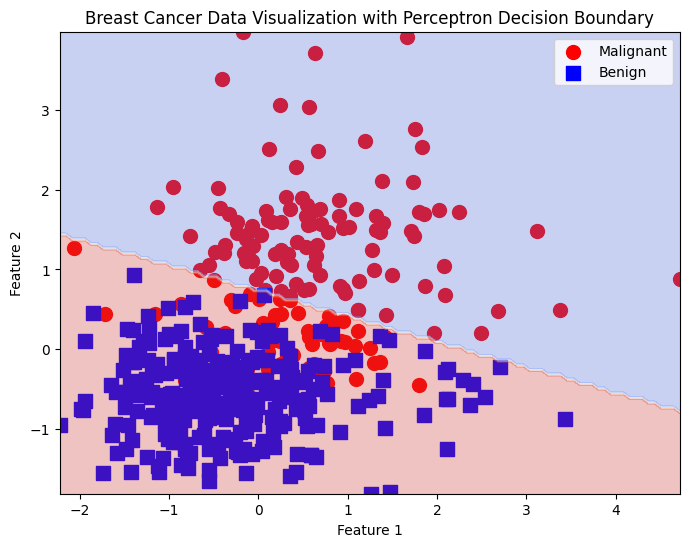

In [22]:
# ایجاد پلات از داده‌های آموزشی با برچسب‌ها
plt.figure(figsize=(8, 6))

# استفاده از رنگ‌ها و شکل‌های مختلف برای هر کلاس
plt.scatter(X_train_2d[y_train == 0, 0], X_train_2d[y_train == 0, 1], color='red', label='Malignant', marker='o', s=100)
plt.scatter(X_train_2d[y_train == 1, 0], X_train_2d[y_train == 1, 1], color='blue', label='Benign', marker='s', s=100)

# رسم مرز تصمیم‌گیری
xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max(), 100),
                     np.linspace(X_train_2d[:, 1].min(), X_train_2d[:, 1].max(), 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# رسم سطح تصمیم‌گیری
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# تنظیمات پلات
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Breast Cancer Data Visualization with Perceptron Decision Boundary')
plt.legend()

# نمایش پلات
plt.show()

## Conclusion

The Perceptron algorithm successfully classifies the Breast Cancer dataset into two classes: **Malignant** and **Benign**. Although the algorithm is simple, its performance is highly dependent on the linear separability of the data. For this dataset, the model achieves an accuracy of approximately **62.28%**, which is acceptable for a basic linear model but could be improved with more advanced algorithms like **Support Vector Machines (SVM)** or **Neural Networks**.

### Potential Improvements:
- Use more complex models like **SVM** or **Neural Networks** to improve classification performance.
- Apply **feature engineering** or **dimensionality reduction** techniques (like **PCA**) to enhance the model’s ability to separate the classes.

This notebook serves as a practical introduction to linear classifiers and can be extended further to explore more complex machine learning models.
